Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Detection de tromperie par analyse de données multimedia/Analyse par modalité texte/VerbalFeatures.XLSX")
df

,Speech_fillers_nbr,speech_errors_bin,passive_voice_bin,positive_emotion_words,Negative_emotion_words,self_references_pour,references_to_others_pour,verb_tense,Motion_verbs,word_count,...,Exclusive_words_bin,hasDate,hasYes,hasNo,hasQuestion,Not_remembering_bin,laugh_bin,crying,repetitions_bin,Class
0,0,0,0,0.0,0.0,20.0,0.0,0.0,0,5,...,0.0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.0,0.0,25.0,0.0,0.0,0,4,...,0.0,0,0,0,0,0,0,0,0,1
2,0,0,0,0.0,0.0,20.0,0.0,0.0,0,5,...,0.0,0,0,1,0,0,0,0,0,1
3,0,0,0,0.0,0.0,0.0,0.0,NaN,0,2,...,0.0,0,0,1,0,0,0,0,0,1
4,3,0,0,0.0,0.5,5.8,10.3,0.0,1,213,...,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4,0,0,1.8,1.8,10.5,0.0,0.0,1,58,...,0.0,0,0,0,0,0,0,0,0,2
192,0,0,0,8.2,0.0,0.0,14.5,0.0,0,62,...,0.0,0,0,0,0,0,0,0,0,2
193,5,0,0,0.0,1.5,0.0,0.0,0.0,1,66,...,0.0,1,0,0,0,0,0,0,0,2
194,0,0,0,0.0,2.9,8.8,5.8,0.0,1,69,...,0.0,0,0,0,0,0,0,0,0,2


First let's separate the list of descriptors from the classes.

---



In [ ]:
descripteur=df.drop(columns=["Class"],axis=1)

In [ ]:
descripteur

,Speech_fillers_nbr,speech_errors_bin,passive_voice_bin,positive_emotion_words,Negative_emotion_words,self_references_pour,references_to_others_pour,verb_tense,Motion_verbs,word_count,...,certain_words_pour,Exclusive_words_bin,hasDate,hasYes,hasNo,hasQuestion,Not_remembering_bin,laugh_bin,crying,repetitions_bin
0,0,0,0,0.0,0.0,20.0,0.0,0.0,0,5,...,0.0,0.0,0,0,1,0,0,0,0,0
1,0,0,0,0.0,0.0,25.0,0.0,0.0,0,4,...,25.0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0.0,0.0,20.0,0.0,0.0,0,5,...,0.0,0.0,0,0,1,0,0,0,0,0
3,0,0,0,0.0,0.0,0.0,0.0,NaN,0,2,...,0.0,0.0,0,0,1,0,0,0,0,0
4,3,0,0,0.0,0.5,5.8,10.3,0.0,1,213,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4,0,0,1.8,1.8,10.5,0.0,0.0,1,58,...,1.7,0.0,0,0,0,0,0,0,0,0
192,0,0,0,8.2,0.0,0.0,14.5,0.0,0,62,...,0.0,0.0,0,0,0,0,0,0,0,0
193,5,0,0,0.0,1.5,0.0,0.0,0.0,1,66,...,0.0,0.0,1,0,0,0,0,0,0,0
194,0,0,0,0.0,2.9,8.8,5.8,0.0,1,69,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
class_tromperie=df["Class"]
class_tromperie.unique()


array([1, 2])

In [ ]:
nom_columns=list(descripteur.columns)
nom_columns

['Speech_fillers_nbr',
 'speech_errors_bin',
 'passive_voice_bin',
 'positive_emotion_words',
 'Negative_emotion_words',
 'self_references_pour',
 'references_to_others_pour',
 'verb_tense',
 'Motion_verbs',
 'word_count',
 'Deny_words_pour',
 'certain_words_pour',
 'Exclusive_words_bin',
 'hasDate ',
 'hasYes',
 'hasNo',
 'hasQuestion',
 'Not_remembering_bin',
 'laugh_bin',
 'crying',
 'repetitions_bin']

Let's deal with NAs(missing values)

In [ ]:
df.isna().sum()

Speech_fillers_nbr            0
speech_errors_bin             0
passive_voice_bin             0
positive_emotion_words        0
Negative_emotion_words        0
self_references_pour          0
references_to_others_pour     0
verb_tense                   14
Motion_verbs                  0
word_count                    0
Deny_words_pour               0
certain_words_pour            0
Exclusive_words_bin           0
hasDate                       0
hasYes                        0
hasNo                         0
hasQuestion                   0
Not_remembering_bin           0
laugh_bin                     0
crying                        0
repetitions_bin               0
Class                         0
dtype: int64

In [ ]:
df.groupby(['Class'])['verb_tense'].apply(lambda x: x.isnull().sum())

Class
1    9
2    5
Name: verb_tense, dtype: int64

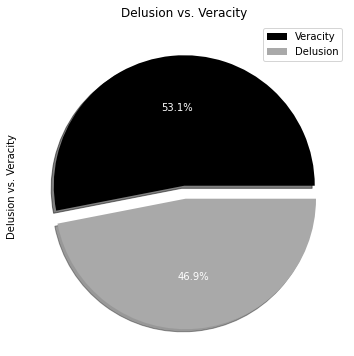

In [ ]:
df["Class"].value_counts().plot(kind = 'pie', 
                                explode = [0, 0.1], 
                                figsize = (6, 6), 
                                autopct = '%1.1f%%', 
                                shadow = True,
                                colors = ['black', 'darkgray'],
                                textprops={'color':"w"})
plt.title('Delusion vs. Veracity')
plt.ylabel("Delusion vs. Veracity")
plt.legend(["Veracity", "Delusion"])
plt.show()

Using Missingno and the famous seaborn libraries, we can depict missing values in many ways. here we will be generating:

*   Bar Chart
*   Heatmap

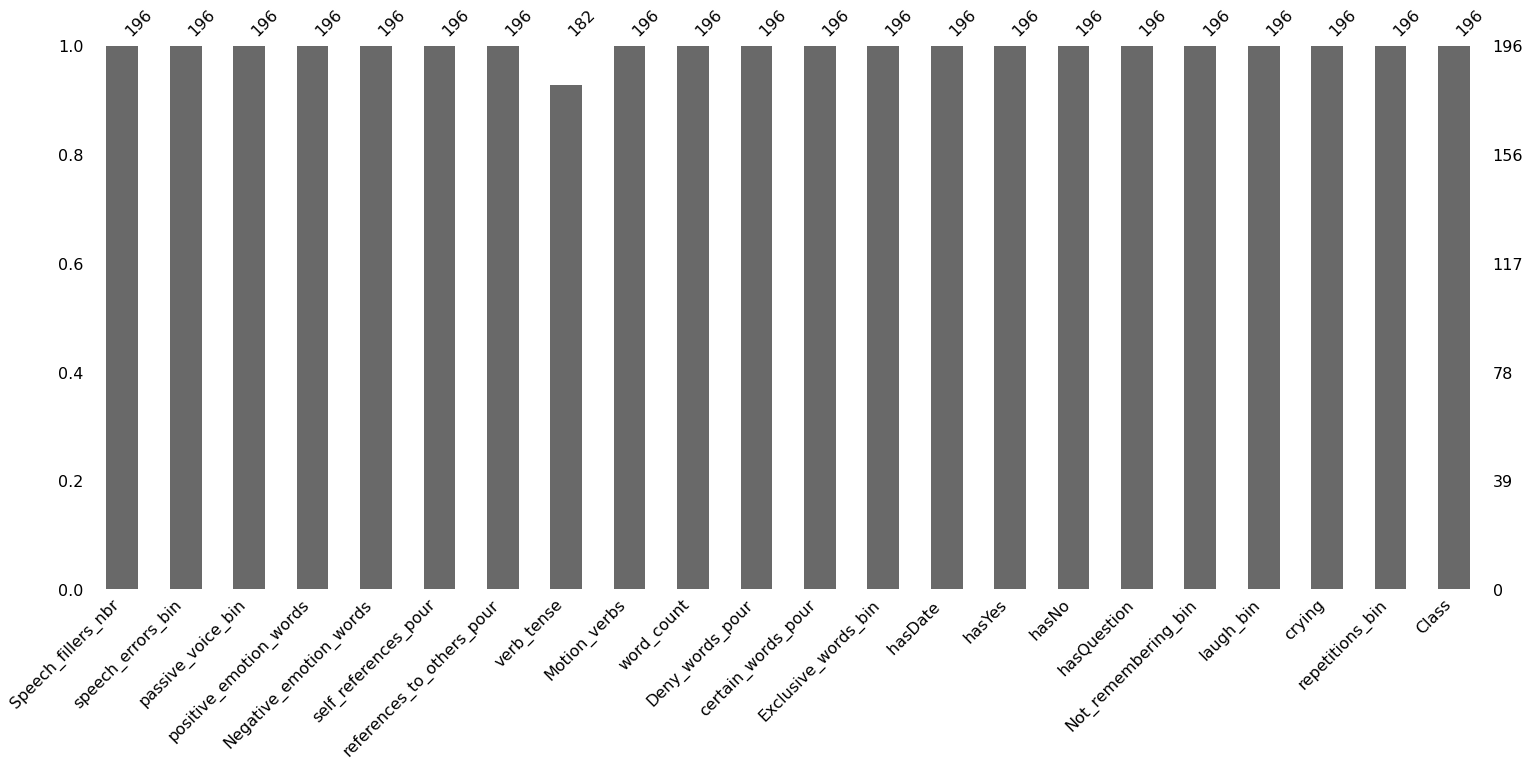

In [ ]:
msno.bar(df)


Correlation heatmap measures correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.

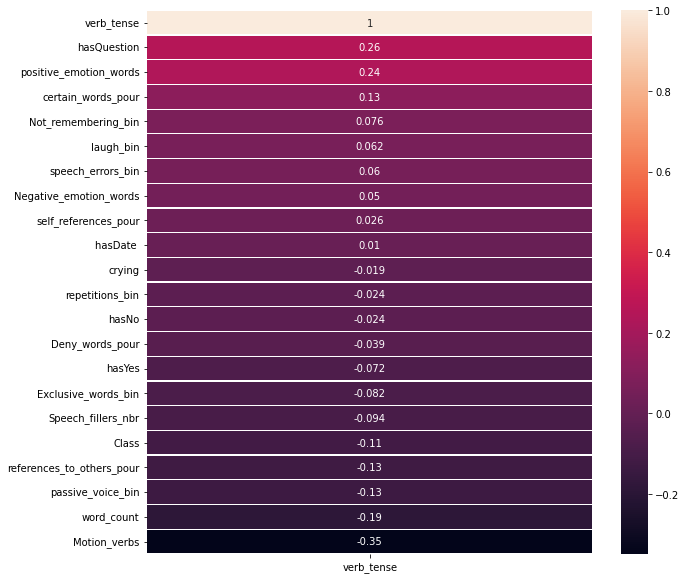

In [ ]:
import seaborn as sns
vt=df.corr()["verb_tense"].sort_values(ascending=False)
vt = vt.to_frame()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=vt,annot=True, linewidths=0.2)

In [ ]:
df1=df[['verb_tense', 'hasQuestion',"positive_emotion_words","certain_words_pour","Not_remembering_bin","laugh_bin"]]
df1[df1['verb_tense'].isna()]

,verb_tense,hasQuestion,positive_emotion_words,certain_words_pour,Not_remembering_bin,laugh_bin
3,NaN,0,0.0,0.0,0,0
46,NaN,0,0.0,0.0,0,0
58,NaN,0,0.0,0.0,0,0
69,NaN,0,0.0,0.0,0,0
90,NaN,0,0.0,100.0,0,0
91,NaN,0,0.0,100.0,0,0
92,NaN,0,0.0,100.0,0,0
93,NaN,0,0.0,0.0,0,0
99,NaN,0,0.0,0.0,0,0
111,NaN,0,0.0,0.0,0,0


We notice that when the verb_tense is absent, the 5 variables to which it is correlated take particular values.
For example laugh_bin ,hasQuestion and positive_emotion_words are always zeroes wheras certain_words_pour takes 0 or 100.

In [ ]:
options=[0.0,100.0]
df2=df1[(df1['hasQuestion'] == 0) & (df1['certain_words_pour'].isin(options)) & (df1['positive_emotion_words'] == 0)  & (df1['Not_remembering_bin'] == 0)  & (df1['laugh_bin'] == 0)]
df2.verb_tense.value_counts()

0.0    68
1.0    19
Name: verb_tense, dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df1)
df_imputed = pd.DataFrame(imputed, columns=df1.columns)
df_imputed["verb_tense"].value_counts()

0.000000    126
1.000000     56
0.216946     11
1.014345      3
Name: verb_tense, dtype: int64

In [ ]:
df_imputed.loc[df_imputed['verb_tense'] < 0.5, 'verb_tense'] = 0
df_imputed.loc[df_imputed['verb_tense'] > 0.5, 'verb_tense'] = 1

In [ ]:
df.verb_tense=df_imputed.verb_tense
df.isna().sum()

Speech_fillers_nbr           0
speech_errors_bin            0
passive_voice_bin            0
positive_emotion_words       0
Negative_emotion_words       0
self_references_pour         0
references_to_others_pour    0
verb_tense                   0
Motion_verbs                 0
word_count                   0
Deny_words_pour              0
certain_words_pour           0
Exclusive_words_bin          0
hasDate                      0
hasYes                       0
hasNo                        0
hasQuestion                  0
Not_remembering_bin          0
laugh_bin                    0
crying                       0
repetitions_bin              0
Class                        0
dtype: int64

Now,we finished dealing with NAs ,let's continue.

The objective is to order the descriptors according to their relevance.

In [ ]:
descripteur=df.drop(columns=["Class"],axis=1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif as I
I_X_C=list(I(descripteur,class_tromperie,random_state=0))
dict_a={}
for i in range(len(I_X_C)):
  dict_a[I_X_C[i]]=nom_columns[i]

In [ ]:
print(dict_a)

{0.03805067522667893: 'Speech_fillers_nbr', 0.0: 'repetitions_bin', 0.06464882958297613: 'Negative_emotion_words', 0.023910811405692955: 'references_to_others_pour', 0.013163926487889555: 'verb_tense', 0.022358884024683556: 'word_count', 0.05086093336256736: 'Deny_words_pour', 0.02493806296565726: 'certain_words_pour', 0.0206259210259645: 'Exclusive_words_bin', 0.010081889477280725: 'hasQuestion', 0.06185173244610365: 'crying'}


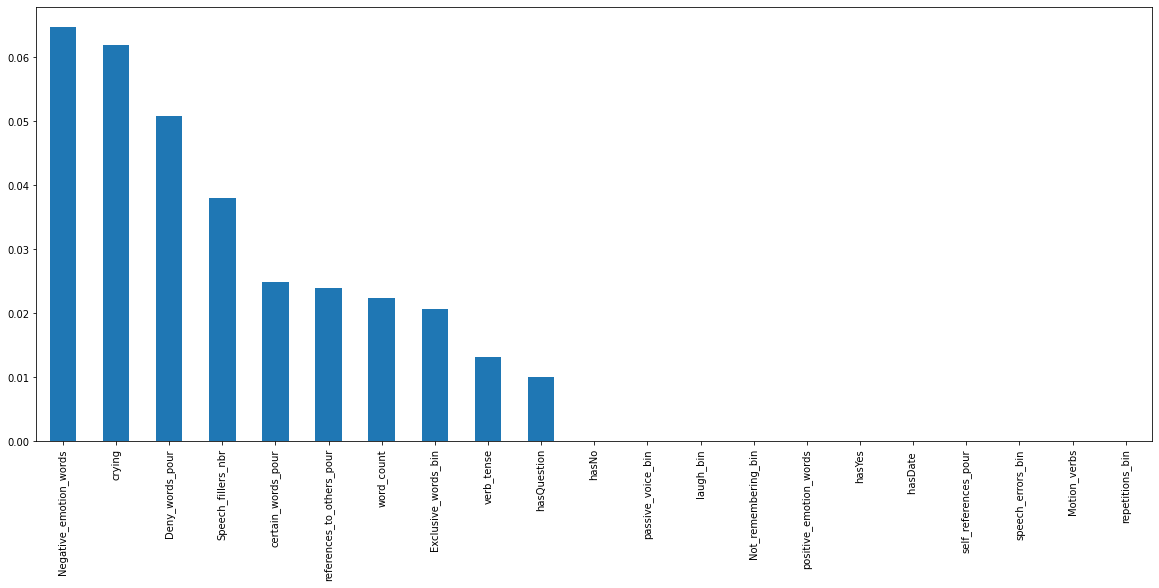

In [ ]:
mutual_info = pd.Series(I_X_C)
mutual_info.index =nom_columns
mutual_info=mutual_info.sort_values(ascending=False)
mutual_info.plot.bar(figsize=(20, 8))


In [ ]:
mutual_info.index

Index(['Negative_emotion_words', 'crying', 'Deny_words_pour',
       'Speech_fillers_nbr', 'certain_words_pour', 'references_to_others_pour',
       'word_count', 'Exclusive_words_bin', 'verb_tense', 'hasQuestion',
       'hasNo', 'passive_voice_bin', 'laugh_bin', 'Not_remembering_bin',
       'positive_emotion_words', 'hasYes', 'hasDate ', 'self_references_pour',
       'speech_errors_bin', 'Motion_verbs', 'repetitions_bin'],
      dtype='object')

First we will try to build a model after scaling the data to give all columns the same importance.
Afterwards, we will train a model with the most important descripteur.

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import
ss = MinMaxScaler()
data_scaled=ss.fit_transform(df)

In [ ]:
data_scaled=(pd.DataFrame(data=data_scaled,columns=df.columns)).reindex(columns=mutual_info.index)
data_scaled=data_scaled.reindex(columns=mutual_info.index)

In [ ]:
data_scaled=data_scaled.iloc[:,[i for i in range(13)]]
data_scaled

,Negative_emotion_words,crying,Deny_words_pour,Speech_fillers_nbr,certain_words_pour,references_to_others_pour,word_count,Exclusive_words_bin,verb_tense,hasQuestion,hasNo,passive_voice_bin,laugh_bin
0,0.000,0.0,0.400,0.000000,0.000,0.000000,0.018868,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000,0.0,0.250,0.000000,0.250,0.000000,0.014151,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.0,0.400,0.000000,0.000,0.000000,0.018868,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000,0.0,0.500,0.000000,0.000,0.000000,0.004717,0.0,0.0,0.0,1.0,0.0,0.0
4,0.025,0.0,0.004,0.250000,0.000,0.309309,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.090,0.0,0.017,0.333333,0.017,0.000000,0.268868,0.0,0.0,0.0,0.0,0.0,0.0
192,0.000,0.0,0.000,0.000000,0.000,0.435435,0.287736,0.0,0.0,0.0,0.0,0.0,0.0
193,0.075,0.0,0.000,0.416667,0.000,0.000000,0.306604,0.0,0.0,0.0,0.0,0.0,0.0
194,0.145,0.0,0.014,0.000000,0.000,0.174174,0.320755,0.0,0.0,0.0,0.0,0.0,0.0


let's build our classification model for Misleading/Veracity detection

In [ ]:
X=data_scaled
Y=class_tromperie.replace(1,0)
Y=Y.replace(2,1)

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y, test_size=0.2,stratify=Y,random_state=42)
Y_train

72     0
27     0
96     0
88     0
17     0
      ..
159    1
148    1
56     0
31     0
25     0
Name: Class, Length: 156, dtype: int64

Resampling is the indispensable tool of modern statistical analysis which involves repeatedly drawing samples from training data and refitting to a model of interest on each sample in order to obtain additional information about the fitted model.
It's obvious that we have a small sample of data and resampling helps us augment it.

In [ ]:
## Resample data 
from sklearn.utils import resample
X_train_resample=pd.concat([X_train,Y_train], axis=1)
all_veracity=X_train_resample[X_train_resample['Class']==1] # All True
all_delusion=X_train_resample[X_train_resample['Class']==0] # All False
#Upsampling the datset by using resample from sklearn library
veracity_upsampled = resample(all_veracity,replace=True,n_samples=4000,random_state=42)
delusion_upsampled = resample(all_delusion,replace=True,n_samples=4250,random_state=42)
# Concatinating upsampled spam messages with ham messaegs to create a new and balanced dataset
df_upsampled = pd.concat([delusion_upsampled, veracity_upsampled])
df_upsampled

,Negative_emotion_words,crying,Deny_words_pour,Speech_fillers_nbr,certain_words_pour,references_to_others_pour,word_count,Exclusive_words_bin,verb_tense,hasQuestion,hasNo,passive_voice_bin,laugh_bin,Class
4,0.025,0.0,0.0040,0.250000,0.000,0.309309,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
13,0.000,0.0,0.0625,0.083333,0.000,0.000000,0.146226,0.0,0.0,0.0,0.0,0.0,0.0,0
46,0.000,0.0,0.0000,0.000000,0.000,0.000000,0.009434,0.0,0.0,0.0,0.0,0.0,0.0,0
97,0.000,0.0,0.0000,0.000000,0.000,0.000000,0.037736,0.0,1.0,1.0,0.0,0.0,0.0,0
78,0.000,0.0,0.0590,0.000000,0.000,0.354354,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000,0.0,0.0000,0.083333,0.071,0.429429,0.061321,0.0,0.0,0.0,0.0,0.0,0.0,1
114,0.025,0.0,0.0050,0.416667,0.000,0.270270,0.891509,0.0,0.0,0.0,0.0,0.0,0.0,1
132,0.000,0.0,0.0320,0.000000,0.000,0.165165,0.589623,0.0,1.0,1.0,0.0,0.0,0.0,1
166,0.000,0.0,0.0060,1.000000,0.000,0.132132,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,1


Now we have almost equally distributed resampled data and enough data to train our model

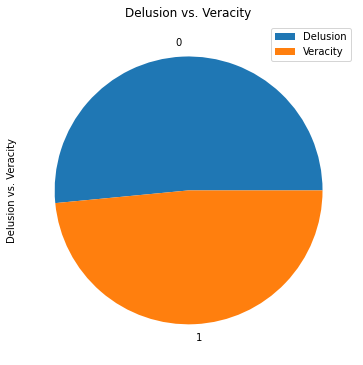

In [ ]:
df_upsampled["Class"].value_counts().plot(kind = 'pie', 
                                          figsize = (6, 7))
                                          #legend=True)
plt.title('Delusion vs. Veracity')
plt.ylabel("Delusion vs. Veracity")
plt.legend(["Delusion", "Veracity"])
plt.show()

In [ ]:
X_train=df_upsampled.drop(columns=["Class"],axis=1)
Y_train=df_upsampled['Class']

For veracity classification and after a lot of search and hyperparameter tunning we found that models tend to vary in terms of metrics to detect delusion.
It means that every ML model have a strength metric so we decided to combine them with the majority vote technic.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm = SVC()
svm.fit(X_train,Y_train)
svm_predictions=svm.predict(X_test)
print(classification_report(Y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.80      0.84      0.82        19

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_SVM = {
        # Parameters that we are going to tune. 
              'gamma': ["auto","scale"],
              'kernel': ['rbf',"linear","poly"]} 
from sklearn.model_selection import RandomizedSearchCV
SVM_Tunning=RandomizedSearchCV(estimator=svm, param_distributions=param_SVM,
                              n_iter=10, scoring='precision', cv=5,refit=True, n_jobs=-1)

In [ ]:
SVM_Tunning.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'gamma': ['auto', 'scale'],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   scoring='precision')

In [ ]:
y_pred=SVM_Tunning.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.68      0.79      0.73        19

    accuracy                           0.73        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40



In [ ]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
scores = cross_val_score(svm, X, Y, cv=cv,scoring="precision")
np.mean(scores)

0.7579487179487179

Descripteur selection :

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
all_desc=df_upsampled.drop(columns='Class',axis=1)
y=df_upsampled["Class"]
metrics_list={}
indice=[]
prec=[]
for i in range (len(all_desc.columns)):
  desc=X_train.iloc[:,0:i+1]
  #data construction
  #model construction  and training
  svm.fit(desc,Y_train) 
  # prediction and evaluation
  y_pred = svm.predict(X_test.iloc[:,0:i+1])
  precision = precision_score(Y_test, y_pred)
  f1=f1_score(Y_test,y_pred)
  rec=recall_score(Y_test, y_pred)
  metrics_list[str(list(desc.columns))]=(precision,f1,rec)
  prec.append(precision)
  indice.append(i)
print(metrics_list)  

{"['Negative_emotion_words']": (0.47368421052631576, 0.6428571428571429, 1.0), "['Negative_emotion_words', 'crying']": (0.47368421052631576, 0.6428571428571429, 1.0), "['Negative_emotion_words', 'crying', 'Deny_words_pour']": (0.5294117647058824, 0.6923076923076924, 1.0), "['Negative_emotion_words', 'crying', 'Deny_words_pour', 'Speech_fillers_nbr']": (0.5, 0.6086956521739131, 0.7777777777777778), "['Negative_emotion_words', 'crying', 'Deny_words_pour', 'Speech_fillers_nbr', 'certain_words_pour']": (0.5384615384615384, 0.6363636363636364, 0.7777777777777778), "['Negative_emotion_words', 'crying', 'Deny_words_pour', 'Speech_fillers_nbr', 'certain_words_pour', 'references_to_others_pour']": (0.5, 0.4, 0.3333333333333333), "['Negative_emotion_words', 'crying', 'Deny_words_pour', 'Speech_fillers_nbr', 'certain_words_pour', 'references_to_others_pour', 'word_count']": (0.5714285714285714, 0.5, 0.4444444444444444), "['Negative_emotion_words', 'crying', 'Deny_words_pour', 'Speech_fillers_nbr'

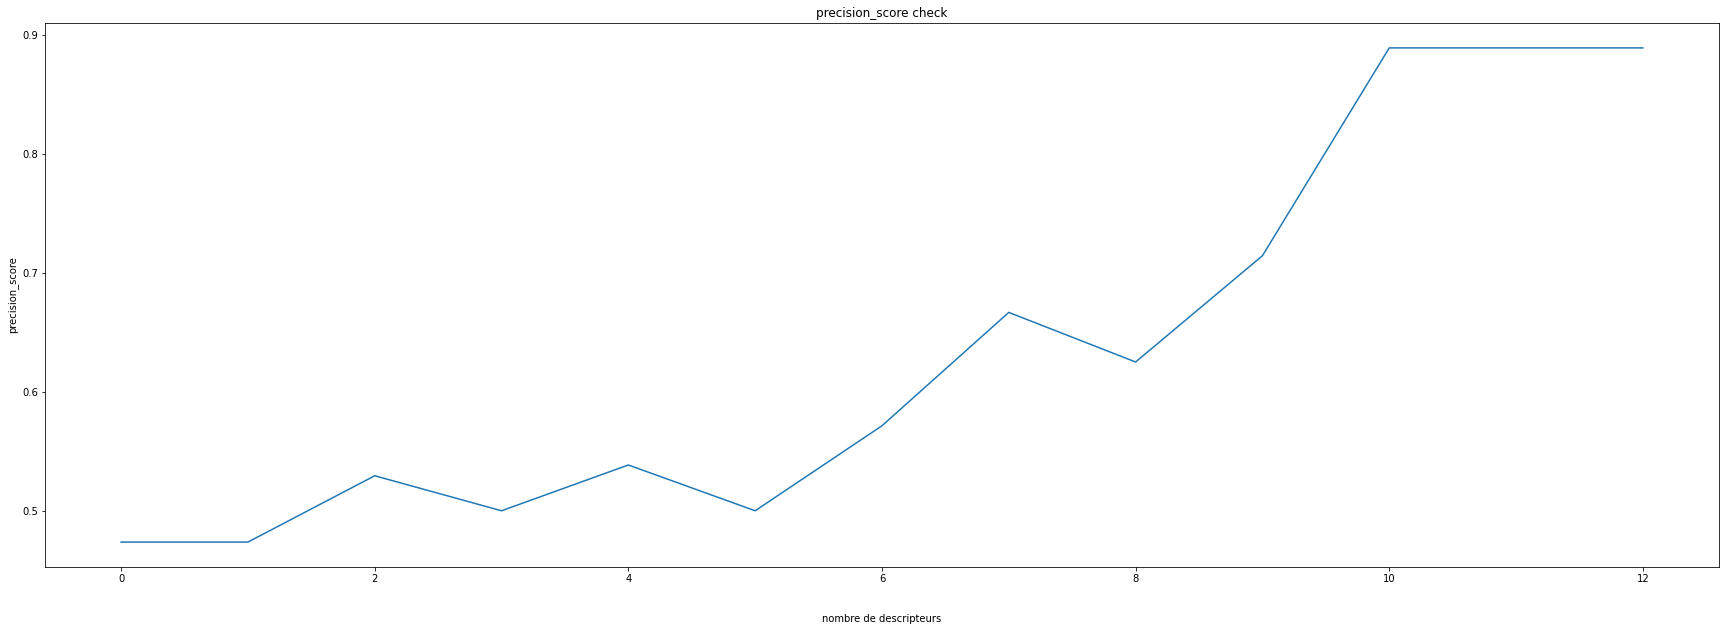

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(indice,prec)
plt.xlabel('nombre de descripteurs', labelpad = 30)
plt.ylabel('precision_score')
plt.title('precision_score check')
plt.show()